In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [4]:
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<font size='5'>**EDA (Exploratory Data Analysis)**

In [6]:
df.duplicated().sum()

1663

In [7]:
df.isin([' ?']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [8]:
df.isin([' ','NA','-']).sum().any()

False

In [9]:
df.drop_duplicates(keep='last', inplace=True)

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

<Axes: >

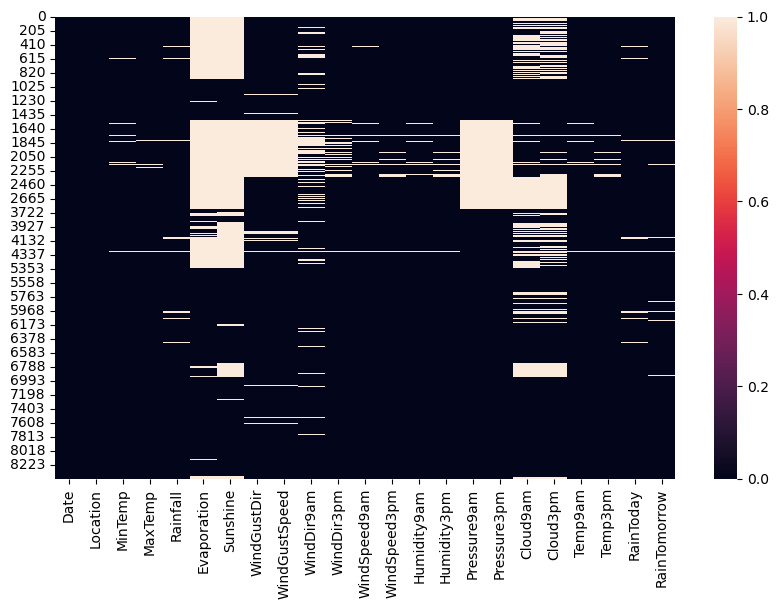

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

<font size='4'>**Observations :-**

- Aside from Date and Location, all columns are missing at least some values.

- These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both.

<font size='5'>**Exploration**

    
<font size='3'>**Summary Info and Stats**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

<font size='4'>**Observations:-**

- The Date column needs converted to a datetime datatype.

- The datatypes for all other columns look good as is.

- There appears to be a large number of missing values across multiple columns.

In [13]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6692.000000  6705.000000  6624.000000  3841.000000  3526.000000   
mean     13.109145    24.098345     2.780148     5.302395     7.890896   
std       5.569574     6.156128    10.591418     4.436790     3.785883   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.500000     0.000000     2.600000     5.400000   
50%      13.200000    23.500000     0.000000     4.600000     9.000000   
75%      17.500000    28.400000     0.800000     7.000000    10.800000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    5820.000000   6699.000000   6662.000000  6708.000000  6666.000000   
mean       38.977663     12.782206     17.571150    67.506559    50.467147   
std        14.418577      9.833499      9.620043    17.251733    18.631086   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000      9.000000    56.000000    38.000000   
50%        37.000000     11.000000     17.000000    68.000000    50.000000   
75%        48.000000     19.000000     24.000000    81.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  5454.000000  5451.000000  4896.000000  4860.000000  6711.000000   
mean   1017.626311  1015.119923     4.336806     4.320988    17.895038   
std       6.712043     6.646755     2.908324     2.740519     5.744117   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.100000  1010.300000     1.000000     1.000000    13.800000   
50%    1017.600000  1015.100000     5.000000     5.000000    18.000000   
75%    1022.200000  1019.600000     7.000000     7.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6670.000000  
mean     22.708561  
std       6.012896  
min       7.300000  
25%      18.300000  
50%      22.100000  
75%      26.800000  
max      44.100000

<Axes: >

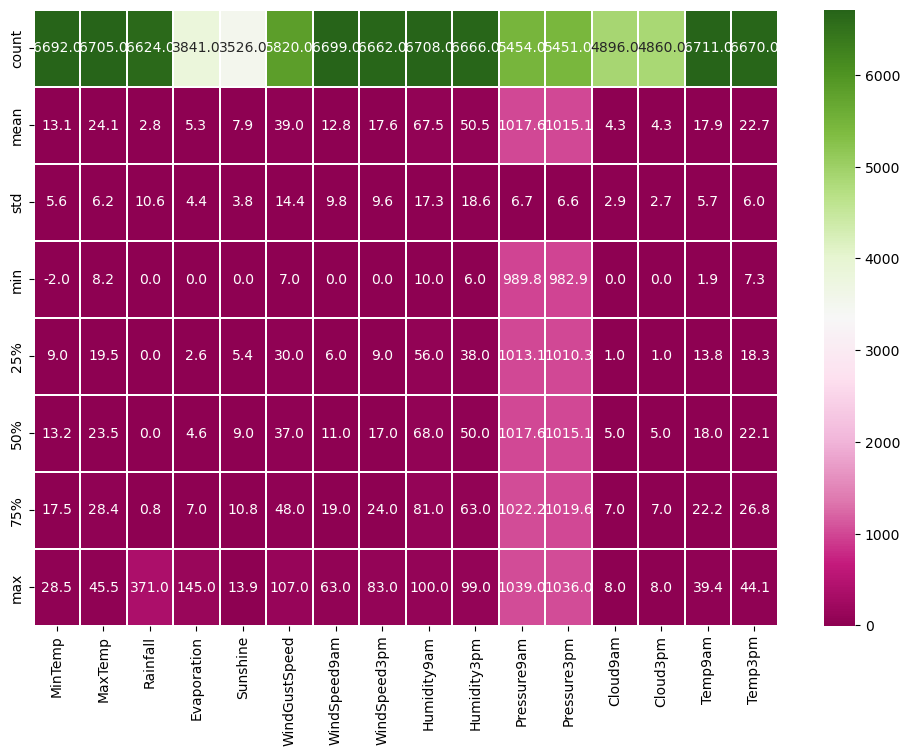

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

<font size='4'>**Observations :-**

- Multiple columns have clear outliers.

- Not seeing any values that are immediate cause for concern (such as a negative value for minimum Rainfall)

In [15]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Date
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
MinTemp
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
MaxTemp
19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
Rainfall
0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
4

<font size='4'>**Observations :-**

- The value counts of the Date column need further explored.

- There's a disconnect between the Rainfall value counts and the RainToday / RainTomorrow value counts.

- The RainToday and RainTomorrow columns should be converted to 0s and 1s for easier manipulation.

In [16]:
df.Date.value_counts()

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

In [17]:
df.Location.nunique()

12

- The maximum number of observations for a given date aligns with the number of unique locations within the dataset. This intuitively makes sense because each weather station at the different locations would be reporting their own data for a given day.

In [18]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts()

0.0    5052
1.0    1572
Name: RainToday, dtype: int64

In [19]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts()

0.0    5052
1.0    1572
Name: RainTomorrow, dtype: int64

Text(0.5, 1.0, 'Histograms of Columns')

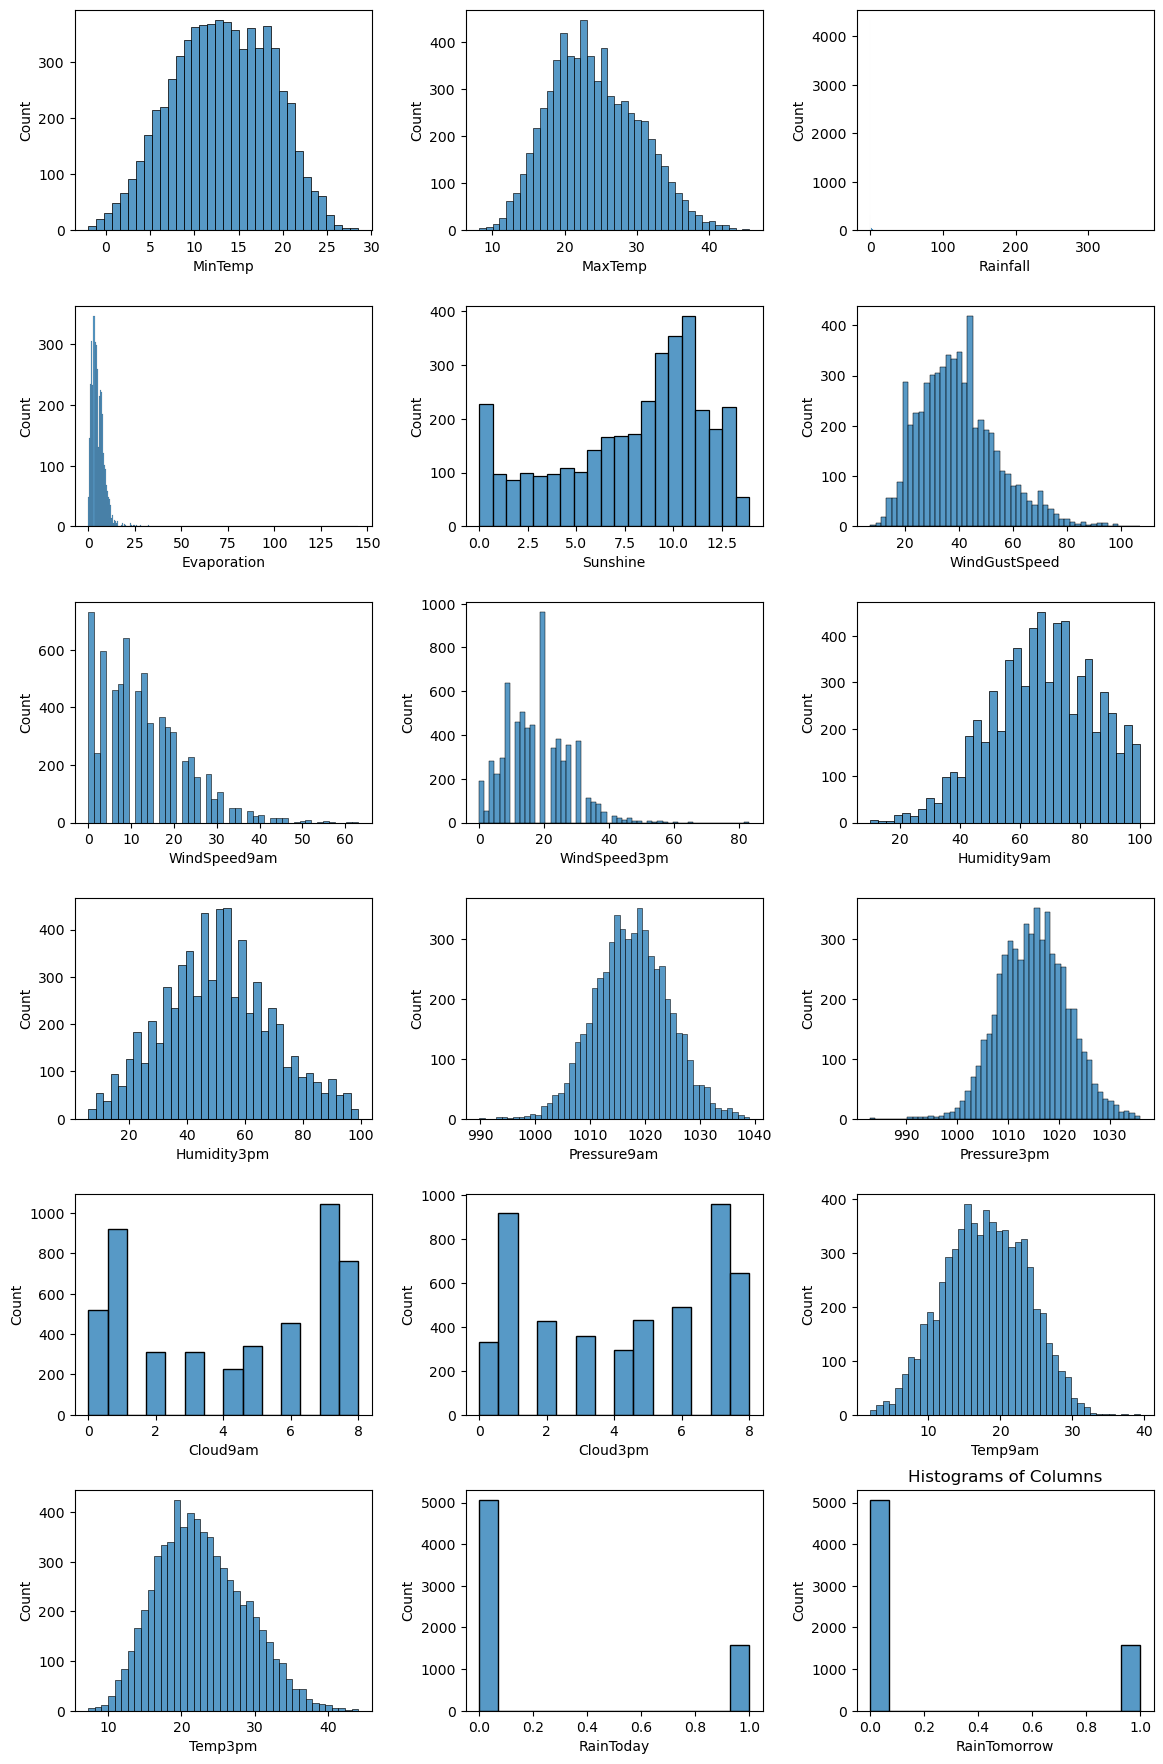

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')

<font size='4'>**Observations :-**

- **Most features are normally distributed as expected :**

    - The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data

    - The Sunshine distribution is interesting but largely explainable:

        - The high frequency of 0 values represents days where it is overcast all day

        - The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it is light out for that many hours or longer

- The Humidity9am distribution is particularly interesting due to the large spike in frequencies.

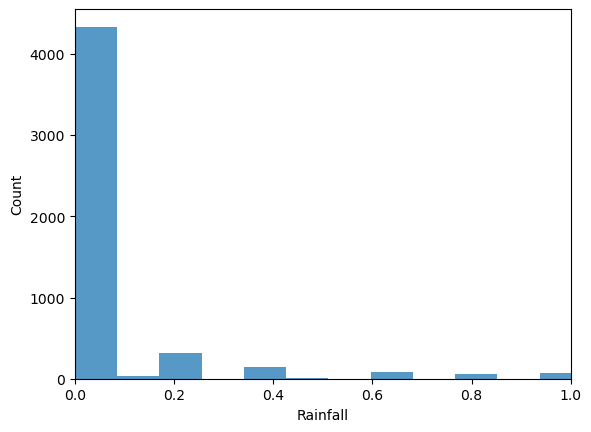

In [21]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

<font size='4'>**Rainy Days by Location**

In [22]:
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

RainToday
Location               
Adelaide           44.0
Albury            199.0
Brisbane          135.0
CoffsHarbour      187.0
Darwin             33.0

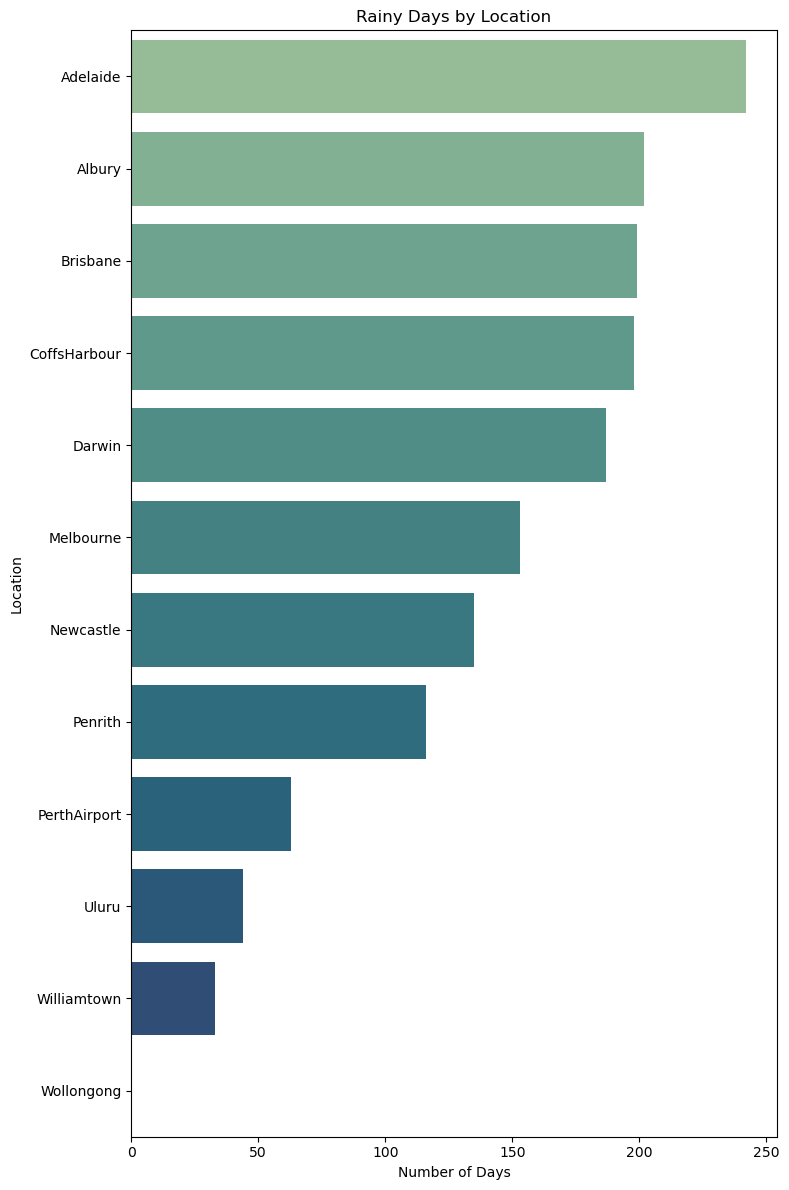

In [23]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

In [24]:
df.Location.value_counts()

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

<font size='4'>**Seasonality**

In [25]:
df_seasonality = df.copy()
df_seasonality['month'] = df_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
df_seasonality[['Date', 'month']].head()

Date  month
0  2008-12-01     12
1  2008-12-02     12
2  2008-12-03     12
3  2008-12-04     12
4  2008-12-05     12

In [26]:
df_seasonality_grouped = df_seasonality.groupby('month').mean()
df_seasonality_grouped[['RainToday']]

RainToday
month           
1       0.170515
2       0.270386
3       0.240741
4       0.281450
5       0.215504
6       0.280120
7       0.227348
8       0.250859
9       0.235977
10      0.237911
11      0.223602
12      0.218569

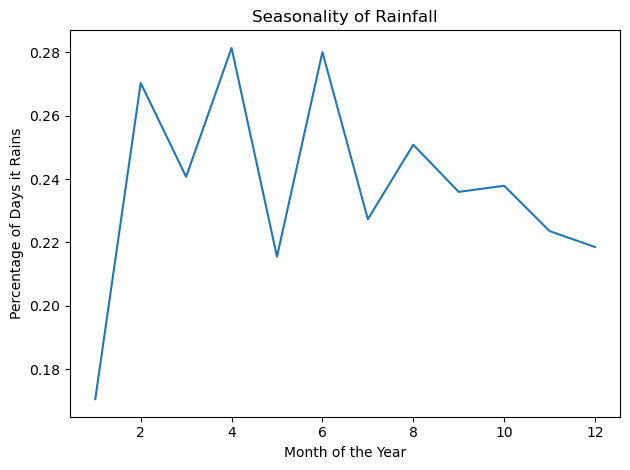

In [27]:
sns.lineplot(data=df_seasonality_grouped, x=df_seasonality_grouped.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()

<font size='5'>**Pairplot**

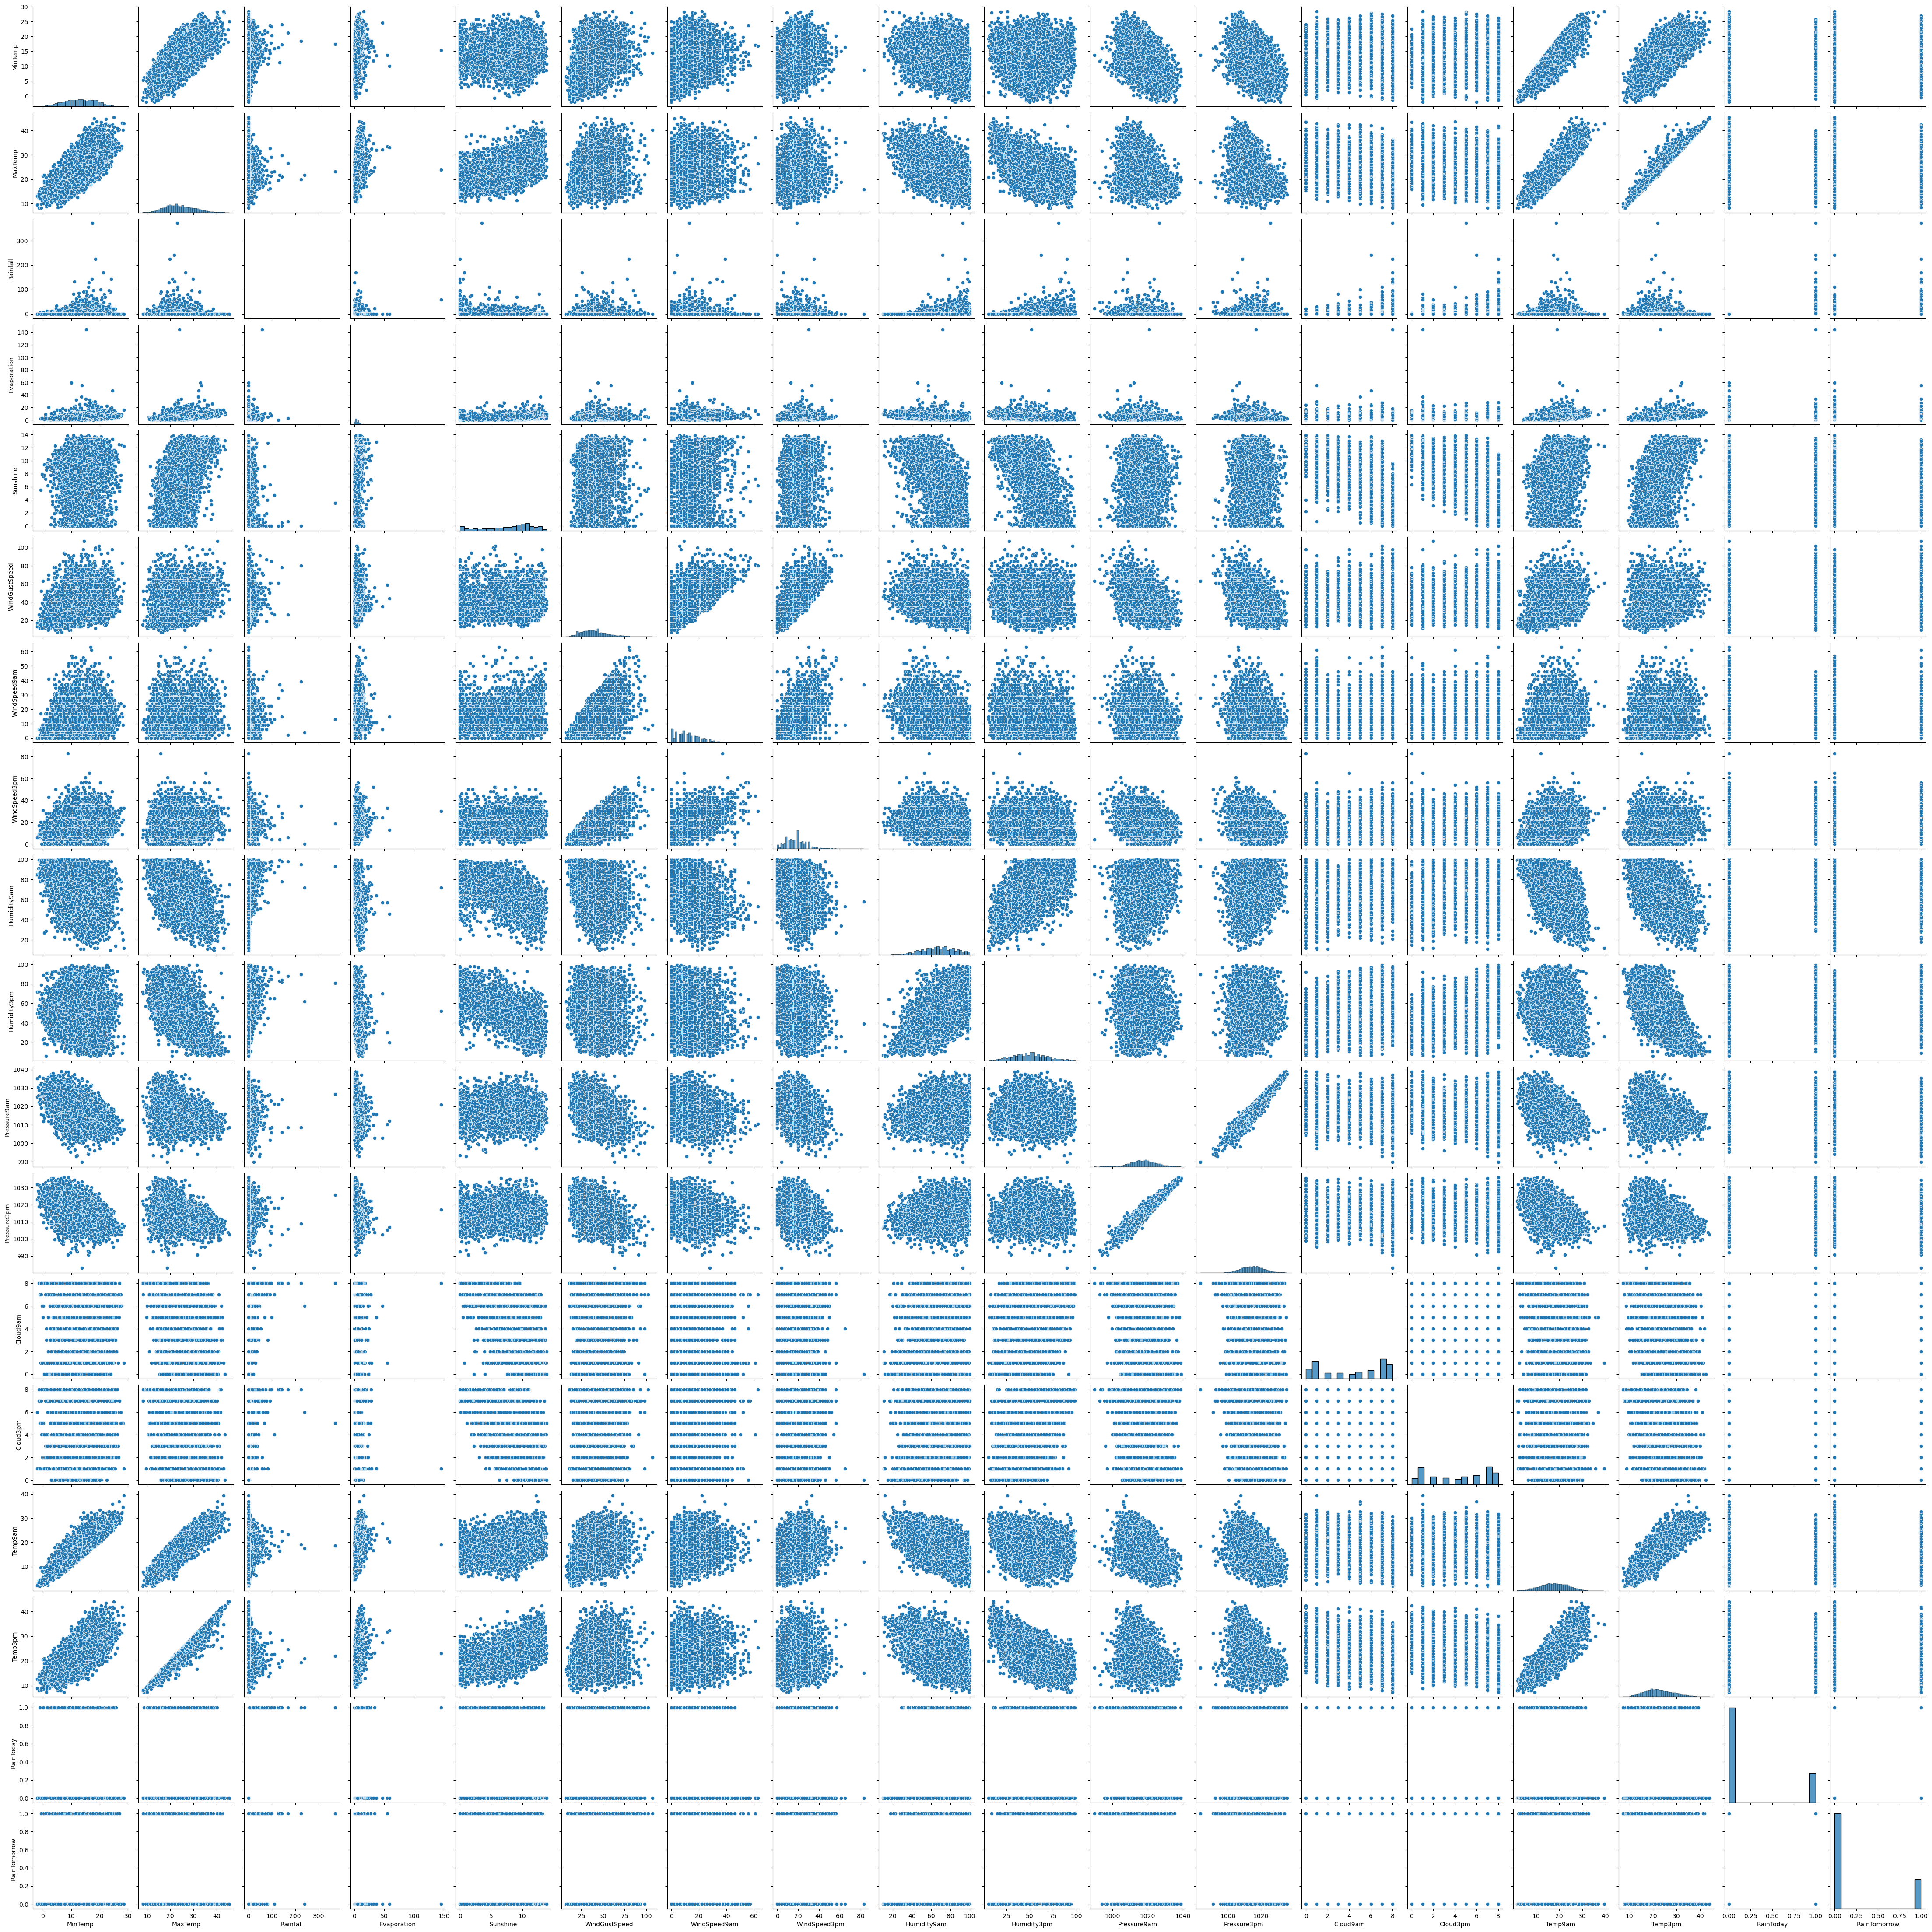

In [28]:
sns.pairplot(df,palette="husl")

<font size='5'>**Encoding Data**

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1      149      134         5          116       140   
1     1         1       89      156         0          116       140   
2     2         1      144      162         0          116       140   
3     3         1      107      185         0          116       140   
4     4         1      190      228         8          116       140   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13             20          13  ...           60           16   
1           14             20           6  ...           33           19   
2           15             21          13  ...           27           24   
3            4              9           9  ...           34           10   
4           13             18           1  ...           71           27   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0           90          103         8         9      145      134          0   
1          119          110         9         9      148      159          0   
2           89          119         9         2      186      148          0   
3          189          160         9         9      157      181          0   
4          121           92         7         8      154      213          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

<font size='4'>**Outliers**
    
**Detection & Removal**

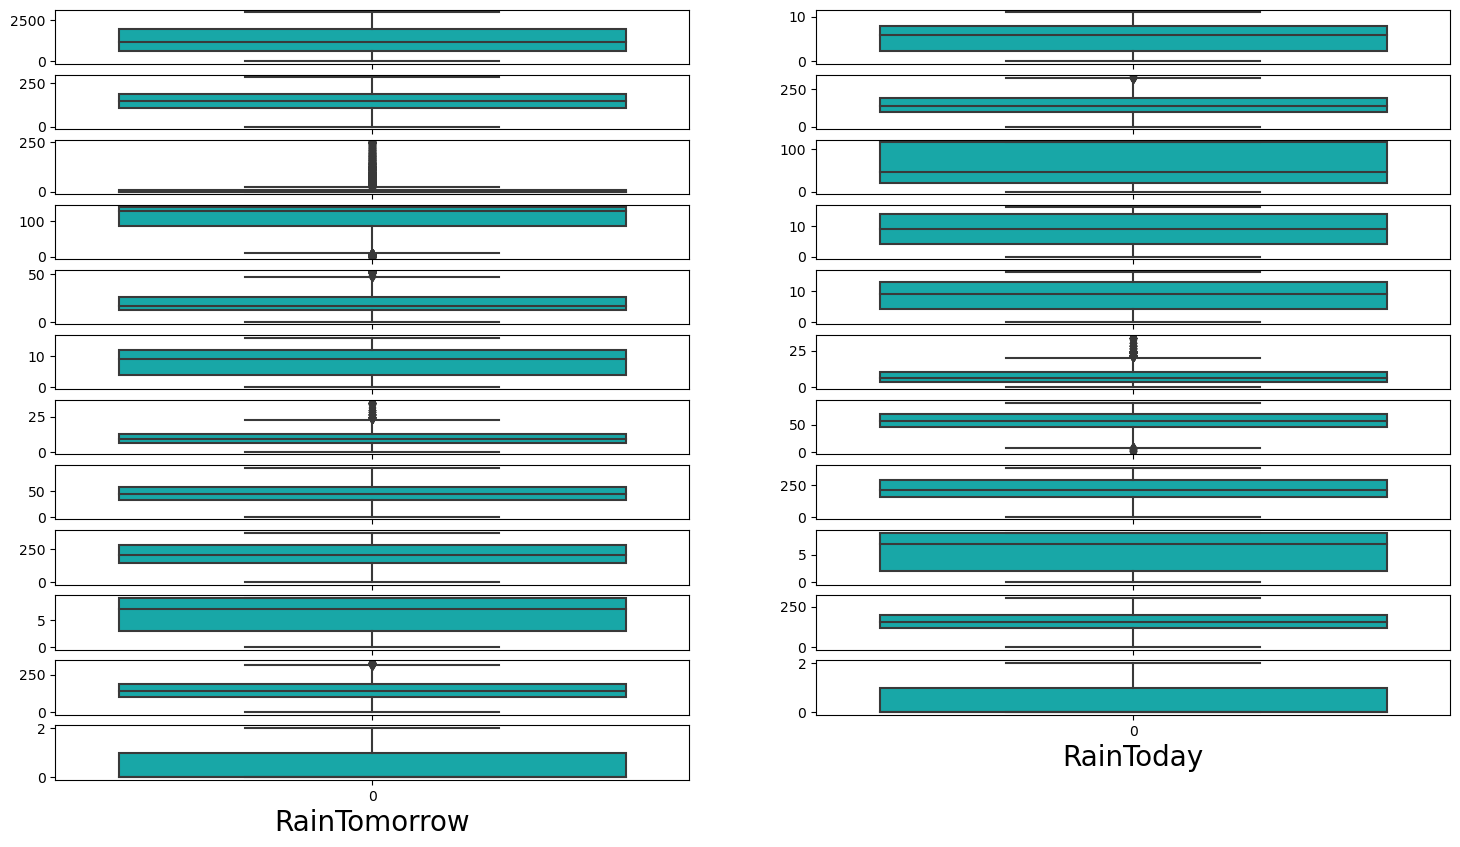

In [30]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in df.columns:
    if plotnumber<=25:
        ax=plt.subplot(12,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<font size='3'>**Outliers removal using Zscore method**

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (6762, 23)
Shape of the dataframe after removing outliers:  (6290, 23)
Percentage of data loss post outlier removal:  6.980183377698905


**Data Loss**

In [32]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((6762-6290)/6762)*100,'%')

Percentage Data Loss : 6.980183377698905 %


<font size='4'>**SKEWNESS**

In [33]:
df.skew()

Date             0.345493
Location         0.003683
MinTemp         -0.049280
MaxTemp          0.352894
Rainfall         3.038267
Evaporation      0.125836
Sunshine        -1.184533
WindGustDir     -0.186080
WindGustSpeed    1.267135
WindDir9am      -0.059847
WindDir3pm      -0.072830
WindSpeed9am     0.754501
WindSpeed3pm     0.407800
Humidity9am     -0.224641
Humidity3pm      0.160082
Pressure9am      0.358069
Pressure3pm      0.359050
Cloud9am        -0.478035
Cloud3pm        -0.401582
Temp9am         -0.066874
Temp3pm          0.324464
RainToday        1.311155
RainTomorrow     1.306812
dtype: float64

<FONT SIZE='5'>**Correlation**

In [34]:
df.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.485018  0.007407  0.070046 -0.002455     0.228720   
Location       0.485018  1.000000  0.094450  0.072800  0.012181     0.047733   
MinTemp        0.007407  0.094450  1.000000  0.717097  0.089718    -0.059970   
MaxTemp        0.070046  0.072800  0.717097  1.000000 -0.164330     0.022721   
Rainfall      -0.002455  0.012181  0.089718 -0.164330  1.000000    -0.026752   
Evaporation    0.228720  0.047733 -0.059970  0.022721 -0.026752     1.000000   
Sunshine       0.280749  0.039145 -0.110285  0.138613 -0.143531     0.714435   
WindGustDir    0.137248  0.006424 -0.136969 -0.194728  0.095529     0.227863   
WindGustSpeed  0.237028  0.217447  0.141101  0.105873  0.062642     0.267078   
WindDir9am     0.042709 -0.135976 -0.143659 -0.236529  0.115593     0.161557   
WindDir3pm     0.035057  0.002148 -0.145263 -0.167978  0.080871     0.060731   
WindSpeed9am  -0.103370  0.259022  0.170550  0.050844  0.053511    -0.300190   
WindSpeed3pm  -0.090328  0.231093  0.194355  0.122340  0.034944    -0.212178   
Humidity9am    0.072750 -0.038813 -0.162209 -0.413955  0.326798     0.155356   
Humidity3pm   -0.039614 -0.000864  0.066448 -0.413904  0.319290    -0.009599   
Pressure9am    0.391338  0.113766 -0.317120 -0.222505 -0.076537     0.383147   
Pressure3pm    0.383564  0.121365 -0.318369 -0.269512 -0.037119     0.381582   
Cloud9am       0.071953 -0.063927 -0.065134 -0.221002  0.131745     0.373068   
Cloud3pm       0.080476 -0.069714 -0.100266 -0.215168  0.099638     0.340774   
Temp9am        0.025340  0.101093  0.887411  0.852813 -0.047946    -0.109530   
Temp3pm        0.067534  0.067832  0.699651  0.958061 -0.172287     0.016666   
RainToday     -0.012423 -0.001946  0.066167 -0.225818  0.753469    -0.033246   
RainTomorrow  -0.008570 -0.000750  0.095195 -0.158370  0.303184    -0.016876   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.280749     0.137248       0.237028    0.042709  ...   
Location       0.039145     0.006424       0.217447   -0.135976  ...   
MinTemp       -0.110285    -0.136969       0.141101   -0.143659  ...   
MaxTemp        0.138613    -0.194728       0.105873   -0.236529  ...   
Rainfall      -0.143531     0.095529       0.062642    0.115593  ...   
Evaporation    0.714435     0.227863       0.267078    0.161557  ...   
Sunshine       1.000000     0.144430       0.180906    0.091427  ...   
WindGustDir    0.144430     1.000000       0.443581    0.391533  ...   
WindGustSpeed  0.180906     0.443581       1.000000    0.075722  ...   
WindDir9am     0.091427     0.391533       0.075722    1.000000  ...   
WindDir3pm     0.029417     0.498313       0.122566    0.218938  ...   
WindSpeed9am  -0.237661    -0.191170       0.079333   -0.315171  ...   
WindSpeed3pm  -0.141884    -0.051244       0.158196   -0.192833  ...   
Humidity9am   -0.072830     0.131279      -0.045905    0.228755  ...   
Humidity3pm   -0.256132     0.129183       0.040309    0.184750  ...   
Pressure9am    0.302645     0.210557       0.286011    0.203525  ...   
Pressure3pm    0.281091     0.254914       0.292724    0.244269  ...   
Cloud9am       0.068708     0.039690      -0.173365    0.120424  ...   
Cloud3pm       0.038340     0.027757      -0.152910    0.094775  ...   
Temp9am       -0.027342    -0.167507       0.111587   -0.211289  ...   
Temp3pm        0.152745    -0.228724       0.055322   -0.250855  ...   
RainToday     -0.157103     0.113656       0.046980    0.136232  ...   
RainTomorrow  -0.221379     0.047929       0.098804    0.021044  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.072750    -0.039614     0.391338     0.383564  0.071953   
Location         -0.038813    -0.000864     0.113766     0.121365 -0.063927   
MinTemp          -0.162209     0.066448    -0.317120    -0.318369 -0.065134   
MaxTemp          -0.413955    -0.413904    -0.222505 

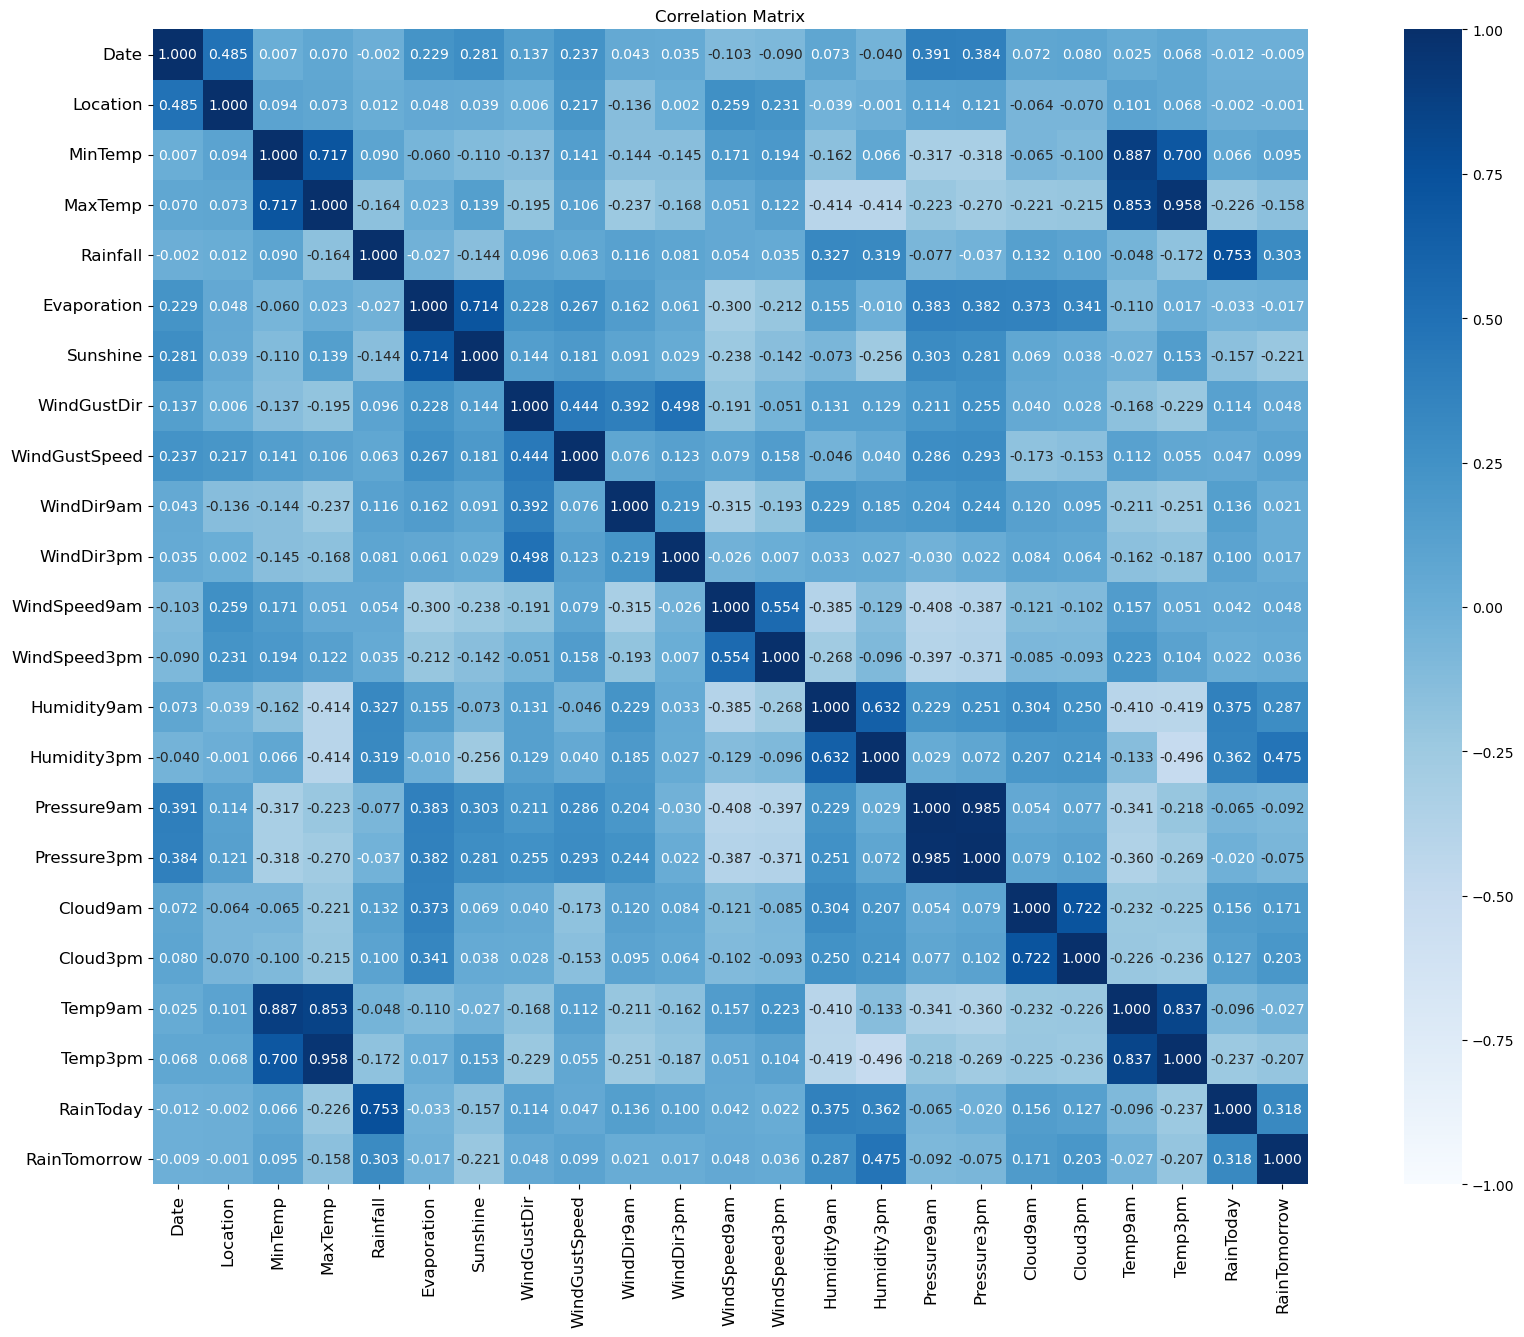

In [35]:
plt.figure(figsize=(25,15))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Blues")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

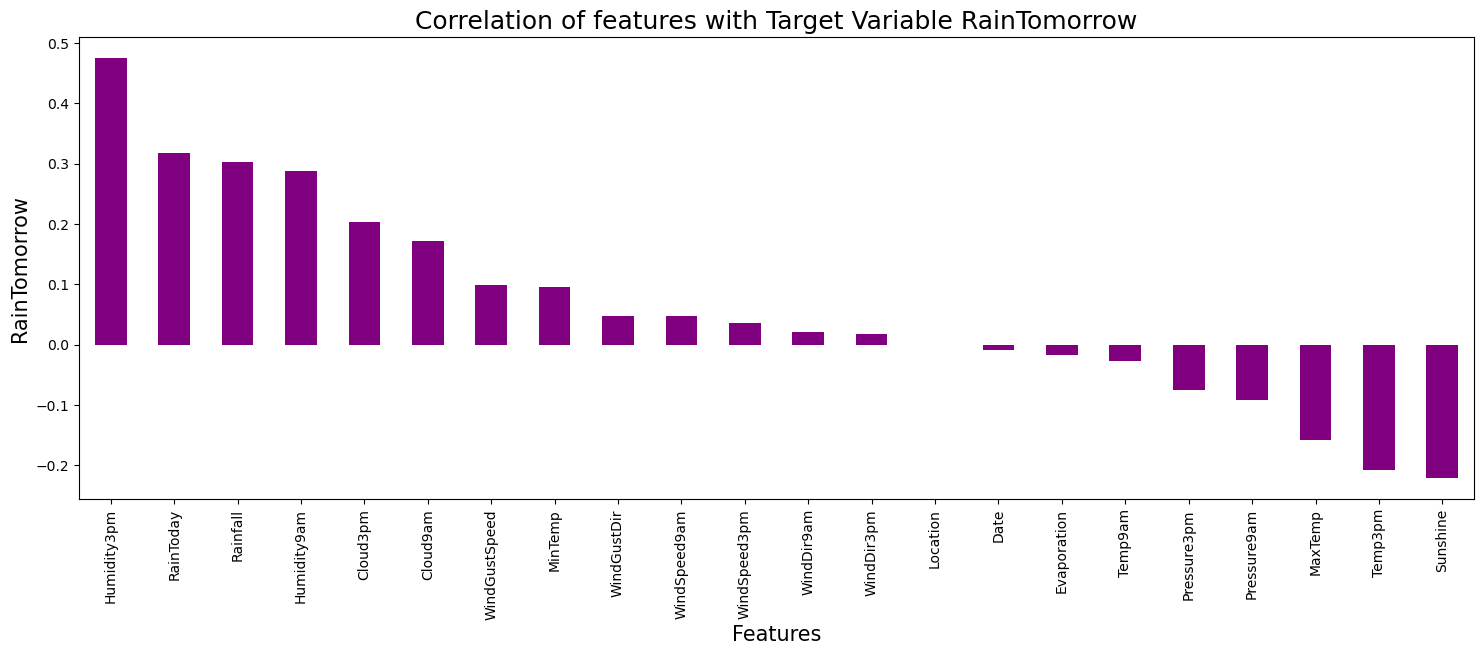

In [36]:
plt.figure(figsize = (18,6))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('RainTomorrow',fontsize=15)
plt.title('Correlation of features with Target Variable RainTomorrow',fontsize = 18)
plt.show()

<font size='5'>**VIF**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF       Features
0     6.152260           Date
1     6.329013       Location
2    56.397235        MinTemp
3    94.782290        MaxTemp
4     2.802040       Rainfall
5     9.707982    Evaporation
6    20.698111       Sunshine
7     7.441686    WindGustDir
8     6.940444  WindGustSpeed
9     5.037537     WindDir9am
10    5.451215     WindDir3pm
11    4.931916   WindSpeed9am
12    7.533972   WindSpeed3pm
13   39.244992    Humidity9am
14   37.011743    Humidity3pm
15  308.595893    Pressure9am
16  298.314110    Pressure3pm
17    9.583910       Cloud9am
18    9.118720       Cloud3pm
19  135.424943        Temp9am
20  151.333981        Temp3pm
21    3.293395      RainToday
22    1.886943   RainTomorrow

<font size='4'>**Balance Imbalanced target feature**

In [38]:
df.RainTomorrow.value_counts()

0    4865
1    1425
Name: RainTomorrow, dtype: int64

<font size='4'>**SMOTE**

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']

In [41]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [42]:
Y.value_counts()

0    4865
1    4865
Name: RainTomorrow, dtype: int64

- We have successfully resolved the class imbalanced problem.

<font size='4'>**Standard Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

<font size='4'>**PCA**

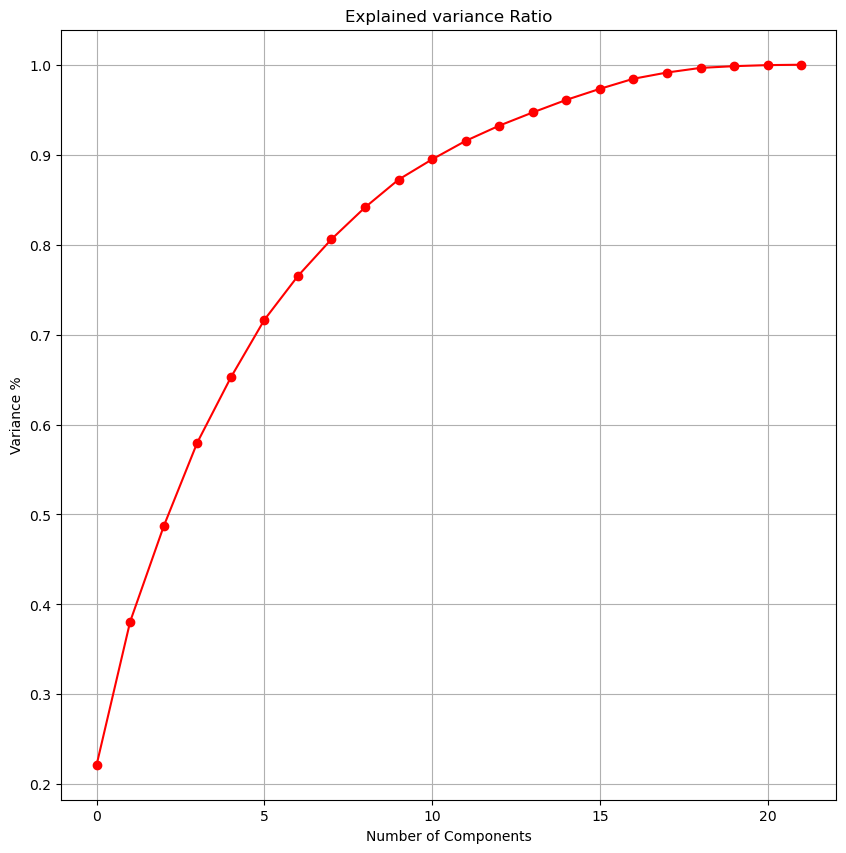

In [44]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [45]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [46]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning (ML) Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6811, 9)
Training target vector size: (6811,)
Test feature matrix size: (2919, 9)
Test target vector size: (2919,)


<font size='4'>**Find Best Random State**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7824597464885235 on Random_state 50


<font size='4'>**Logistic Regression**

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=50, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7824597464885235


Confusion matrix of Logistics Regression : 
 [[1127  313]
 [ 322 1157]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1440
           1       0.79      0.78      0.78      1479

    accuracy                           0.78      2919
   macro avg       0.78      0.78      0.78      2919
weighted avg       0.78      0.78      0.78      2919



<font size='4'>**Find Optimal value of n_neighbors for KNN**

In [51]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for K= ' , K , 'is:', error)

RMSE value for K=  1 is: 0.37202629324282244
RMSE value for K=  2 is: 0.3969738217340937
RMSE value for K=  3 is: 0.40254415302587654
RMSE value for K=  4 is: 0.4126303296763641
RMSE value for K=  5 is: 0.41552601663866623
RMSE value for K=  6 is: 0.41799206806107375
RMSE value for K=  7 is: 0.4216641040562233
RMSE value for K=  8 is: 0.4240944648399855
RMSE value for K=  9 is: 0.42931305023381483
RMSE value for K=  10 is: 0.42691239926088564
RMSE value for K=  11 is: 0.4352567532468651
RMSE value for K=  12 is: 0.43249319036515504


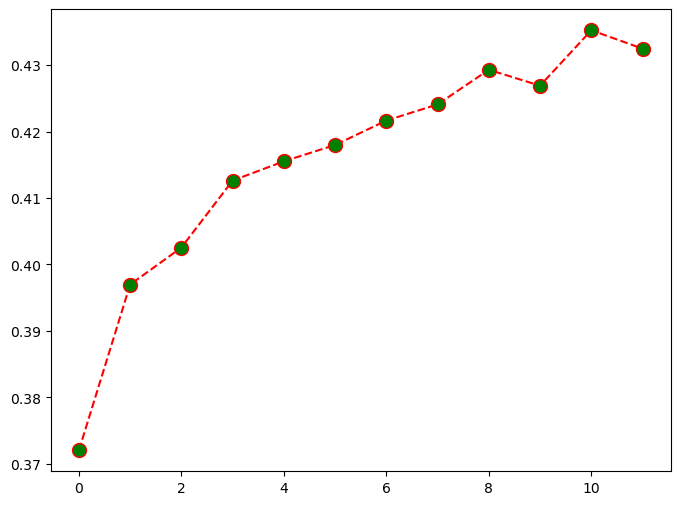

In [52]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- At K = 1, we get the minimum RMSE value which approximately 0.37202629324282244 , and shoots up on further increasing the k value. We can safely say that K = 1 will give us the best result in this case.

<font size='4'>**Apply other Classification Algorithm**

In [53]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 1),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('*******************************************************************************************************************')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7824597464885235


Confusion matrix : 
 [[1127  313]
 [ 322 1157]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1440
           1       0.79      0.78      0.78      1479

    accuracy                           0.78      2919
   macro avg       0.78      0.78      0.78      2919
weighted avg       0.78      0.78      0.78      2919



*******************************************************************************************************************
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8317917094895512


Confusion matrix : 
 [[1186  254]
 [ 237 1242]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1440
           1       0.83      0.84      0.83      1479

    accuracy                    

<font size='4'>**Cross Validation**

In [54]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 1),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('*****************************************************************************************************************')



Cross Validation Score LogisticRegression() :

Score : [0.65724563 0.57810894 0.61253854 0.7672148  0.78982528]
Mean Score : 0.6809866392600206
Std deviation : 0.08380184278530374


*****************************************************************************************************************


Cross Validation Score SVC() :

Score : [0.53391572 0.46454265 0.6274409  0.76002055 0.7713258 ]
Mean Score : 0.6314491264131552
Std deviation : 0.121229284199756


*****************************************************************************************************************


Cross Validation Score GaussianNB() :

Score : [0.68499486 0.47944502 0.65364851 0.78006166 0.76875642]
Mean Score : 0.6733812949640289
Std deviation : 0.10827063750632365


*****************************************************************************************************************


Cross Validation Score DecisionTreeClassifier() :

Score : [0.61253854 0.5364851  0.64182939 0.76361768 0.73792395]
Mean Score : 

- **ExtraTreesClassifier() gives us best accuracy compare to other classifier algorithm, so we will hyper-tuning ExtraTreesClassifier().**

# Hyper Parameter Tuning


**GridSearchCV**

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400],
              'bootstrap' : [True, False]
             }

In [57]:
GCV = GridSearchCV(ExtraTreesClassifier(), param_grid, cv = 5, n_jobs = -1)

In [58]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]})

In [59]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 400}

<font size='4'>**Final Model**

In [60]:
Final_mod = ExtraTreesClassifier(bootstrap = False, criterion = 'entropy', n_estimators = 400, max_depth = 30 ,
                                 min_samples_split= 3, max_features= 'auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8773552586502227


<font size='4'>**Confusion Matrix**

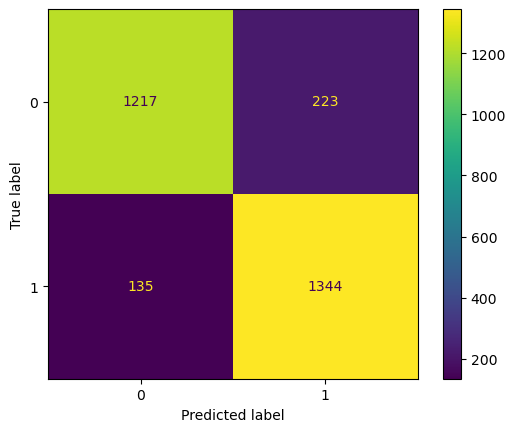

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=Matrix)
disp.plot()
plt.show()

<font size='4'>**Roc-Curve**

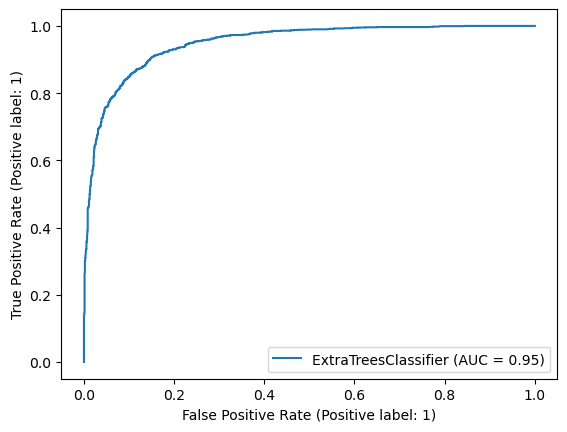

Auc Score :
 0.8769304992111787


In [62]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
RocCurveDisplay.from_estimator(Final_mod,X_test,Y_test)   
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

<font size='4'>**Save the Model**

In [63]:
import joblib
joblib.dump(Final_mod,'Weather_AUS_Final.pkl')

['Weather_AUS_Final.pkl']

<font size='4'>**Predict the Model**

In [64]:
prediction = Final_mod.predict(X_test)

In [65]:
Original = np.array(Y_test)
df = pd.DataFrame()
df["Original Rain Tomorrow"] = Original
df["Predicted Rain Tomorrow"] = prediction
df

Original Rain Tomorrow  Predicted Rain Tomorrow
0                          0                        0
1                          1                        0
2                          1                        1
3                          1                        1
4                          0                        0
...                      ...                      ...
2914                       1                        1
2915                       0                        0
2916                       0                        1
2917                       1                        1
2918                       0                        0

[2919 rows x 2 columns]